In [114]:
# conda install anaconda::openpyxl

import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from branca.colormap import LinearColormap
import geodatasets
from shapely import wkt

In [4]:
directory = "C:/Users/Daniel.DESKTOP-2H2HP2R/repos/hamburg_echarging/"

In [5]:
# Funktion zur Uwandlung von xlsx in csv
def convert_xls_to_csv(input_file, output_file, sheet_name=0):
    
    try:
        data = pd.read_excel(input_file, sheet_name=sheet_name)
        data.to_csv(output_file, index=False)
        print(f"Erfolgreich konvertiert: {input_file} -> {output_file}")
    except Exception as e:
        print(f"Fehler: {e}")

In [6]:
# Dateien
input_file = "dtv-dtvw-2004-2023-download-data.xlsx"
output_file = "dtv-dtvw-2004-2023-download-data.csv"

# Ausführen der Funktion
convert_xls_to_csv(input_file, output_file)

Erfolgreich konvertiert: dtv-dtvw-2004-2023-download-data.xlsx -> dtv-dtvw-2004-2023-download-data.csv


In [62]:
# Einladen des deutschlandweiten Ladesäulenregisters und der Hamburger Verkehrsstärke
ladesaeulenregister = pd.read_csv(directory +'Ladesaeulenregister_01122024.csv', header = 0, encoding= 'unicode_escape', delimiter= ';')
verkehrsstaerke = pd.read_csv(directory +'dtv-dtvw-2004-2023-download-data.csv', header = 0, encoding= 'unicode_escape', delimiter= ',')


C:\Users\Daniel.DESKTOP-2H2HP2R\AppData\Local\Temp\ipykernel_6768\3649124898.py:2: DtypeWarning: Columns (29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  ladesaeulenregister = pd.read_csv(directory +'Ladesaeulenregister_01122024.csv', header = 0, encoding= 'unicode_escape', delimiter= ';')


In [14]:
# Informationenabfrag
print(verkehrsstaerke['zaehlstelle'].describe())
print(ladesaeulenregister['Betreiber'].describe())

count    1428.000000
mean     2924.792717
std       901.720521
min      1013.000000
25%      2392.000000
50%      2934.000000
75%      3556.000000
max      7621.000000
Name: zaehlstelle, dtype: float64
count                            80723
unique                           10849
top       EnBW mobility+ AG und Co.KG 
freq                              3972
Name: Betreiber, dtype: object


In [26]:
#Einladen Zaehlstellen CSV-Dateien
bedarfszaehlstellen = pd.read_csv(directory +'verkehrszaehlstellen_csv/app_kfz_bedarfszaehlstellen_EPSG_25832.csv', header = 0, encoding= 'unicode_escape', delimiter= ';')
dauerzaehlstellen = pd.read_csv(directory +'verkehrszaehlstellen_csv/app_kfz_dauerzaehlstellen_EPSG_25832.csv', header = 0, encoding= 'unicode_escape', delimiter= ';')
jahreszaehlstellen = pd.read_csv(directory +'verkehrszaehlstellen_csv/app_kfz_jaehrliche_zaehlstellen_EPSG_25832.csv', header = 0, encoding= 'unicode_escape', delimiter= ';')
pegel = pd.read_csv(directory +'verkehrszaehlstellen_csv/app_kfz_pegel_EPSG_25832.csv', header = 0, encoding= 'unicode_escape', delimiter= ';')

In [69]:
#Zusammenführen der CSV-Dateien
zaehlstellen_all = pd.concat([bedarfszaehlstellen, dauerzaehlstellen, jahreszaehlstellen, pegel], axis=0, ignore_index=True)
print(zaehlstellen_all)
zaehlstellen_all.to_csv("C:/Users/Daniel.DESKTOP-2H2HP2R/repos/hamburg_echarging/zaehlstellen_all.csv", index = False)

                                 ï»¿_fid  zaehlstelle  \
0     APP_KFZ_BEDARFSZAEHLSTELLEN_163670            2   
1     APP_KFZ_BEDARFSZAEHLSTELLEN_163671            3   
2     APP_KFZ_BEDARFSZAEHLSTELLEN_163672            5   
3     APP_KFZ_BEDARFSZAEHLSTELLEN_163673            6   
4     APP_KFZ_BEDARFSZAEHLSTELLEN_163674            7   
...                                  ...          ...   
2364                 APP_KFZ_PEGEL_37376         4088   
2365                 APP_KFZ_PEGEL_37377         4092   
2366                 APP_KFZ_PEGEL_37378         4094   
2367                 APP_KFZ_PEGEL_37379         4098   
2368                 APP_KFZ_PEGEL_37380         4102   

                                   bezeichnung  knoten letzte_zaehlung  \
0        Osdorfer LandstraÃe / WindmÃ¼hlenweg     NaN      01.01.2023   
1                Neue StraÃe / Harburger Ring     NaN      01.01.2023   
2     Elise-Averdieck-StraÃe / Oben Borgfelde     NaN      01.01.2024   
3          Oberhafe

In [102]:
# Zusammenfuehrung der georeferenzierten Zaehlstellen(zaehlstellen_all.csv) mit den Zaehlstaerken(dtv-dtvw-2004-2023-download-data.csv)
georef_verkehr = verkehrsstaerke.merge(
    zaehlstellen_all[['zaehlstelle', 'geom', 'coordinate_reference_system']],
    on='zaehlstelle',
    how='left'  # "left" sorgt dafür, dass alle Zeilen aus verkehrsstaerke erhalten bleiben
)

# Ergebnis speichern
georef_verkehr.to_csv('georef_verkehr.csv', index=False)

# Ergebnis anzeigen (optional)
print(georef_verkehr)

      zaehlstelle  Ebene                                     Bezeichnung  \
0            1013    371                    Krohnstieg NO Garstedter Weg   
1            1013    371                    Krohnstieg NO Garstedter Weg   
2            1013    371                    Krohnstieg NO Garstedter Weg   
3            1013    371                    Krohnstieg NO Garstedter Weg   
4            1017    372                    Garstedter Weg SW Krohnstieg   
...           ...    ...                                             ...   
1423         7459    221                    Hammer StraÃe NW Grenzknick   
1424         7621     96  EulenkrugstraÃe W Im Meienthun (Landesgrenze)   
1425         7621     96  EulenkrugstraÃe W Im Meienthun (Landesgrenze)   
1426         7621     96  EulenkrugstraÃe W Im Meienthun (Landesgrenze)   
1427         7621     96  EulenkrugstraÃe W Im Meienthun (Landesgrenze)   

                  Kategorie   2004   2005   2006   2007   2008   2009  ...  \
0        

In [72]:
# Ausschneiden des Ladesaeulenregisters auf die Stadflaeche Hamburgs und nur Schnellladesaeulen

# Filter anwenden: Nur Zeilen, in denen das Bundesland "Hamburg" ist
hamburg_tabelle = ladesaeulenregister[(ladesaeulenregister['Bundesland'] == 'Hamburg') & (ladesaeulenregister['Art der Ladeeinrichtung'] == 'Schnellladeeinrichtung')]

# Replace commas with dots in the coordinate columns (Latitude and Longitude)
hamburg_tabelle['Laengengrad'] = hamburg_tabelle['Laengengrad'].str.replace(',', '.')
hamburg_tabelle['Breitengrad'] = hamburg_tabelle['Breitengrad'].str.replace(',', '.')

# Replace formatting error
hamburg_tabelle['Betreiber'] = hamburg_tabelle['Betreiber'].str.replace('ï¿½', 'ue')
hamburg_tabelle['Strasse'] = hamburg_tabelle['Strasse'].str.replace('straï¿½e', 'strasse')
hamburg_tabelle['Strasse'] = hamburg_tabelle['Strasse'].str.replace('Straï¿½e', 'Strasse')

# Gefilterte Tabelle speichern
hamburg_tabelle.to_csv('hamburg_tabelle.csv', index=False)

# Gefilterte Tabelle anzeigen (optional)
print(hamburg_tabelle)

                               Betreiber        Anzeigename (Karte)  \
36057     E.ON Drive Infrastructure GmbH  E.ON Drive Infrastructure   
36058     E.ON Drive Infrastructure GmbH  E.ON Drive Infrastructure   
36059     E.ON Drive Infrastructure GmbH  E.ON Drive Infrastructure   
36060     E.ON Drive Infrastructure GmbH  E.ON Drive Infrastructure   
36061     E.ON Drive Infrastructure GmbH  E.ON Drive Infrastructure   
...                                  ...                        ...   
37640             Shell Deutschland GmbH                        NaN   
37641             Shell Deutschland GmbH                        NaN   
37669  Hamburger Energiewerke Mobil GmbH                 HEnW-Mobil   
37670  Hamburger Energiewerke Mobil GmbH                 HEnW-Mobil   
37692                 Comfortcharge GmbH             Comfort Charge   

                 Strasse Hausnummer             Adresszusatz  Postleitzahl  \
36057   Mï¿½nckebergstr.          1  Media Markt, Parkdeck 7       20

C:\Users\Daniel.DESKTOP-2H2HP2R\AppData\Local\Temp\ipykernel_6768\2234794685.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamburg_tabelle['Laengengrad'] = hamburg_tabelle['Laengengrad'].str.replace(',', '.')
C:\Users\Daniel.DESKTOP-2H2HP2R\AppData\Local\Temp\ipykernel_6768\2234794685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamburg_tabelle['Breitengrad'] = hamburg_tabelle['Breitengrad'].str.replace(',', '.')
C:\Users\Daniel.DESKTOP-2H2HP2R\AppData\Local\Temp\ipykernel_6768\2234794685.py:11

In [73]:
# Kontrolle
print(hamburg_tabelle['Breitengrad'].describe())

count            330
unique           193
top       53.5716060
freq              12
Name: Breitengrad, dtype: object


In [ ]:
# Kartenerstellung der Ladesaeulen und Verkehrsstaerken: https://geopandas.org/en/stable/gallery/plotting_with_folium.html
# conda install folium -c conda-forge
# conda install geodatasets -c conda-forge

In [100]:
# hamburg_tabelle = 'hamburg_tabelle.csv'

In [101]:
# Create point geometries
geometry = gpd.points_from_xy(hamburg_tabelle.Laengengrad, hamburg_tabelle.Breitengrad)
geo_df = gpd.GeoDataFrame(
    hamburg_tabelle,
    geometry=geometry
)
geo_df.head()

,Betreiber,Anzeigename (Karte),Strasse,Hausnummer,Adresszusatz,Postleitzahl,Ort,Kreis/kreisfreie Stadt,Bundesland,Breitengrad,...,Steckertypen4,P4 [kW],Public Key4,Steckertypen5,P5 [kW],Public Key5,Steckertypen6,P6 [kW],Public Key6,geometry
36057,E.ON Drive Infrastructure GmbH,E.ON Drive Infrastructure,Mï¿½nckebergstr.,1,"Media Markt, Parkdeck 7",20095.0,Hamburg,Kreisfreie Stadt Hamburg,Hamburg,53.550522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (10.00572 53.55052)
36058,E.ON Drive Infrastructure GmbH,E.ON Drive Infrastructure,Mï¿½nckebergstr.,1,"Media Markt, Parkdeck 7",20095.0,Hamburg,Kreisfreie Stadt Hamburg,Hamburg,53.550522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (10.00572 53.55052)
36059,E.ON Drive Infrastructure GmbH,E.ON Drive Infrastructure,Mï¿½nckebergstr.,1,"Media Markt, Parkdeck 7",20095.0,Hamburg,Kreisfreie Stadt Hamburg,Hamburg,53.550522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (10.00572 53.55052)
36060,E.ON Drive Infrastructure GmbH,E.ON Drive Infrastructure,Mï¿½nckebergstr.,1,NaN,20095.0,Hamburg,Kreisfreie Stadt Hamburg,Hamburg,53.550522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (10.00572 53.55052)
36061,E.ON Drive Infrastructure GmbH,E.ON Drive Infrastructure,Mï¿½nckebergstr.,1,"Media Markt, Parkdeck 7",20095.0,Hamburg,Kreisfreie Stadt Hamburg,Hamburg,53.550522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (10.00572 53.55052)


In [75]:
df1 = pd.read_csv("hamburg_tabelle.csv")
# Keep only relevant columns
df = df1.loc[:, ("Betreiber", "Breitengrad", "Laengengrad")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Betreiber    330 non-null    object 
 1   Breitengrad  330 non-null    float64
 2   Laengengrad  330 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.9+ KB


In [76]:
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

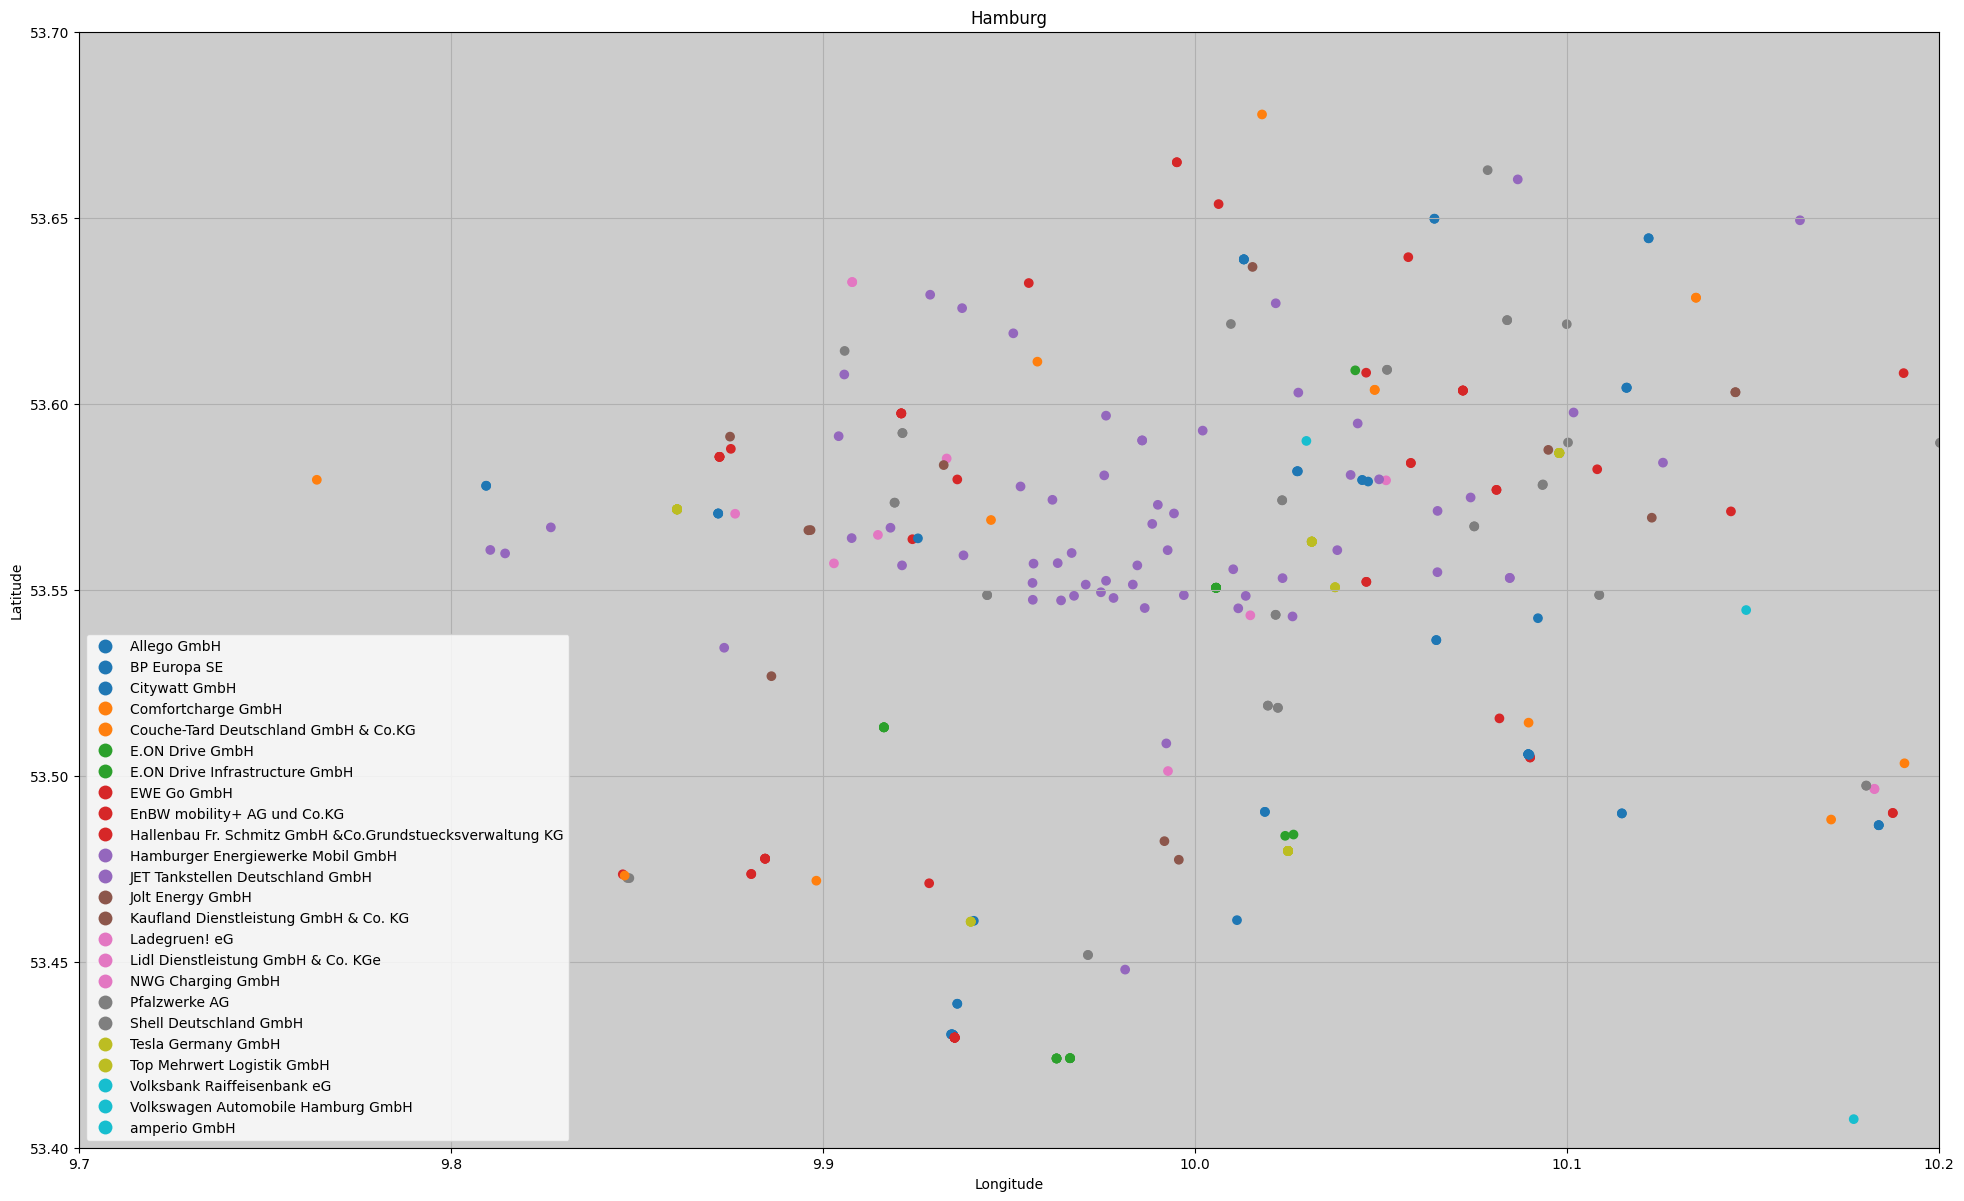

In [77]:
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column="Betreiber", ax=ax, legend=True)

# Set title
plt.title("Hamburg")

# Add coordinate labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Set zoom level by defining axis limits
# You'll need to determine appropriate values for your area of interest
# Example for Hamburg area (approximate coordinates):
ax.set_xlim(9.7, 10.2)  # Longitude range
ax.set_ylim(53.4, 53.7)  # Latitude range

# Optional: Add grid
ax.grid(True)

In [78]:
# 1. Prepare the data
betreibers = geo_df["Betreiber"].unique()
n_betreibers = len(betreibers)
print(n_betreibers)

# 2. Generate a color palette (e.g., 'Set3', 'viridis', 'Paired')
colors = LinearColormap(
    colors=["#FF5733",  # kräftiges Orange
    "#33FF57",  # frisches Grün
    "#3357FF",  # kräftiges Blau
    "#FF33A1",  # Pink
    "#A133FF",  # Violett
    "#33FFF5",  # Türkis
    "#FFC300",  # Gelb
    "#FF6F33",  # Hellorange
    "#33FFBD",  # Mintgrün
    "#8D33FF",  # Dunkelviolett
    "#FF3333",  # Rot
    "#33D4FF",  # Himmelblau
    "#C70039",  # Weinrot
    "#900C3F",  # Dunkelrot
    "#DAF7A6",  # Hellgrün
    "#581845",  # Aubergine
    "#1ABC9C",  # Jadegrün
    "#2ECC71",  # Smaragdgrün
    "#3498DB",  # Mittelblau
    "#9B59B6",  # Lila
    "#34495E",  # Dunkelblau/Grau
    "#F39C12",  # Safran
    "#D35400",  # Terracotta
    "#7F8C8D" ],  # Graublau],  # or any palette
    index=range(n_betreibers), 
    vmin=0, 
    vmax=n_betreibers
).to_step(n_betreibers)

# 3. Map each Betreiber to a color
betreiber_color_map = {
    betreiber: colors(i) 
    for i, betreiber in enumerate(betreibers)
}

# 4. Create the map
m = folium.Map(
    location=[geo_df.geometry.centroid.y.mean(), geo_df.geometry.centroid.x.mean()],
    zoom_start=12
)

# 5. Add colored markers (no popup)
for idx, row in geo_df.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,  # Adjust size
        color=betreiber_color_map[row["Betreiber"]],
        fill=True,
        fill_color=betreiber_color_map[row["Betreiber"]],
    ).add_to(m)

# 6. Add a legend
legend = '''
     <div style="position: fixed; 
                 bottom: 50px; right: 50px; width: 300px; height: auto; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white; padding: 10px;">
         <b>Betreiber Legend</b><br>
         {}
     </div>
'''.format(
    '<br>'.join([
        f'<i style="background:{betreiber_color_map[betreiber]}; width: 15px; height: 15px; display: inline-block;"></i> {betreiber}'
        for betreiber in betreibers
    ])
)

m.get_root().html.add_child(folium.Element(legend))

# 7. Save or display
m  # Display in notebook (if using Jupyter)



24


In [106]:
# This example uses heatmaps to visualize the density of volcanoes
# which is more in some parts of the world compared to others.

from folium import plugins

map = folium.Map(location=[53.6503, 9.9728], tiles="Cartodb dark_matter", zoom_start=10)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map

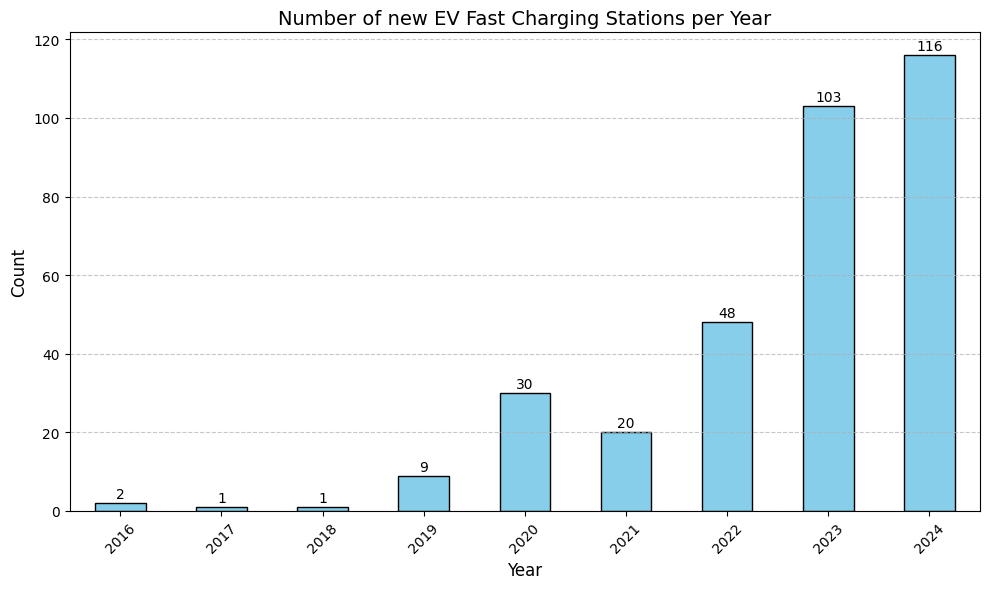

In [93]:
# Load data and extract years
df1 = pd.read_csv("hamburg_tabelle.csv")
years = pd.to_datetime(df1["Inbetriebnahmedatum"], format='%d.%m.%Y', errors='coerce').dt.year
year_counts = years.dropna().value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 6))
bars = year_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add exact counts on top of each bar
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position (center of bar)
        bar.get_height() + 0.5,             # y-position (slightly above bar)
        f'{int(bar.get_height())}',         # text (count value)
        ha='center',                        # horizontal alignment
        va='bottom',                        # vertical alignment
        fontsize=10
    )

# Customize the plot
plt.title("Number of new EV Fast Charging Stations per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# https://www.kba.de/DE/Statistik/Produktkatalog/produkte/Fahrzeuge/fz13_b_uebersicht.html;jsessionid=3F4CAFEC87BFE643BB7571F6368ECAC7.live11311?nn=4543062
# 2023: 13.186 (E), 4.356 (P)
# 2022: 13078(E), 14481(P)
# 2021: 7334 (E), 8295 (P)
# 2020: 3395(E), 2502(P)
# 2019: 1395 (E), 1227 (P)
# 2018: 1126 (E), 879 (P)
# 2017: 608 (E), 760 (P)
# 2016: 358 (E), - (P)

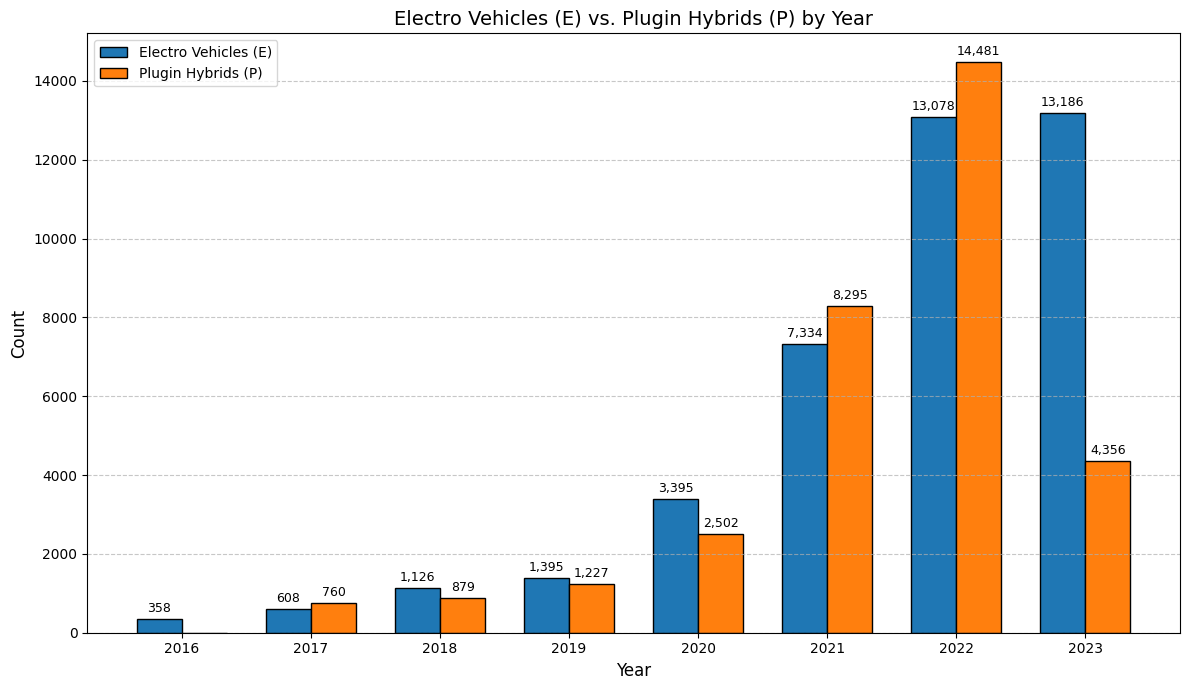

In [94]:
# Data
years = np.array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
E = np.array([358, 608, 1126, 1395, 3395, 7334, 13078, 13186])
P = np.array([0, 760, 879, 1227, 2502, 8295, 14481, 4356])  # 2016 P set to 0 (missing)

# Plot
plt.figure(figsize=(12, 7))
width = 0.35  # Bar width

# Create bars
bars_E = plt.bar(years - width/2, E, width, label='Electro Vehicles (E)', color='#1f77b4', edgecolor='black')
bars_P = plt.bar(years + width/2, P, width, label='Plugin Hybrids (P)', color='#ff7f0e', edgecolor='black')

# Add counts on top of bars
for bars in [bars_E, bars_P]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Skip zero (2016 P)
            plt.text(bar.get_x() + bar.get_width()/2, height + 100,
                    f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# Customize
plt.title("Electro Vehicles (E) vs. Plugin Hybrids (P) by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(years)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [104]:
print(georef_verkehr.geom)

0       POINT (564489.000000 5944555.000000)
1       POINT (564489.000000 5944555.000000)
2       POINT (564489.000000 5944555.000000)
3       POINT (564489.000000 5944555.000000)
4       POINT (564402.000000 5944460.000000)
                        ...                 
1423    POINT (570825.000000 5935165.000000)
1424    POINT (578726.000000 5944586.000000)
1425    POINT (578726.000000 5944586.000000)
1426    POINT (578726.000000 5944586.000000)
1427    POINT (578726.000000 5944586.000000)
Name: geom, Length: 1428, dtype: object


In [130]:
# Check if geom is a string
print(type(georef_verkehr.geom.iloc[0]))
print(traffic_df.geom)

<class 'str'>
0       POINT (564489.000000 5944555.000000)
1       POINT (564489.000000 5944555.000000)
2       POINT (564489.000000 5944555.000000)
3       POINT (564489.000000 5944555.000000)
4       POINT (564402.000000 5944460.000000)
                        ...                 
1423    POINT (570825.000000 5935165.000000)
1424    POINT (578726.000000 5944586.000000)
1425    POINT (578726.000000 5944586.000000)
1426    POINT (578726.000000 5944586.000000)
1427    POINT (578726.000000 5944586.000000)
Name: geom, Length: 1428, dtype: object


In [140]:
# 1. Read CSV (ensure proper encoding)
df = pd.read_csv("georef_verkehr.csv", encoding='utf-8')  # or 'latin-1' if UTF-8 fails

# 2. Clean the geom column
# Drop rows where geom is NaN or not a string
df = df.dropna(subset=['geom'])
df['geom'] = df['geom'].astype(str)  # Force string type

# 3. Parse WKT safely (skip invalid geometries)
def safe_wkt_load(x):
    try:
        return wkt.loads(x)
    except:
        return None

df['geom'] = df['geom'].apply(safe_wkt_load)

# 4. Drop rows where geometry parsing failed
df = df.dropna(subset=['geom'])

# 5. Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry='geom',
    crs="EPSG:25832"  # UTM Zone 32N (adjust if needed)
)

print(gdf.head())

   zaehlstelle  Ebene                   Bezeichnung              Kategorie  \
0         1013    371  Krohnstieg NO Garstedter Weg          DTV (Kfz/24h)   
1         1013    371  Krohnstieg NO Garstedter Weg         DTVw (Kfz/24h)   
2         1013    371  Krohnstieg NO Garstedter Weg  SV-Anteil am DTVw (%)   
3         1013    371  Krohnstieg NO Garstedter Weg     Baustelleneinfluss   
4         1017    372  Garstedter Weg SW Krohnstieg          DTV (Kfz/24h)   

    2004   2005   2006   2007   2008   2009  ...   2016   2017   2018   2019  \
0  51000  52000  52000  53000  52000  52000  ...  51000  52000  51000  51000   
1  56000  56000  57000  58000  57000  56000  ...  56000  56000  56000  56000   
2      6      6      6      6      6      6  ...      5      4      5      5   
3    NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN   
4  12000  11000  11000  11000  11000  11000  ...  13000  12000  12000  12000   

    2020   2021   2022   2023                     

In [145]:
# 1. Convert UTM (EPSG:25832) to Lat/Lon (EPSG:4326)
gdf = gdf.to_crs("EPSG:4326")  # Reproject to WGS84

# 2. Create Folium map centered on Hamburg
map = folium.Map(location=[53.5506, 9.9937],  # Hamburg coordinates
                 tiles="Cartodb dark_matter", 
                 zoom_start=11)

# 3. Prepare heatmap data as [lat, lon] pairs
heat_data = [[point.y, point.x] for point in gdf.geometry]  # Note: y=lat, x=lon

# 4. Add HeatMap layer
plugins.HeatMap(heat_data, radius=15, blur=10).add_to(map)  # Adjust radius/blur as needed

# Display the map
map